# Vector Fields

---

```{admonition} Revised
03 Apr 2023
```
```{contents}
```

---

## Programming Environment

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib        as mpl
import matplotlib.pyplot as plt
from   mpl_toolkits.mplot3d import axes3d
from   ipywidgets           import interactive
plt.style.use('ggplot');
%matplotlib widget

import plotly
import plotly.figure_factory as ff
import plotly.graph_objects  as go

from   datetime import datetime as d
import locale                   as l
import platform                 as p
import sys                      as s

pad = 20
print(f"{'Executed'.upper():<{pad}}: {d.now()}")
print()
print(f"{'Platform'        :<{pad}}: "
      f"{p.mac_ver()[0]} | "
      f"{p.system()} | "
      f"{p.release()} | "
      f"{p.machine()}")
print(f"{''                :<{pad}}: {l.getpreferredencoding()}")
print()
print(f"{'Python'          :<{pad}}: {s.version}")
print(f"{''                :<{pad}}: {s.version_info}")
print(f"{''                :<{pad}}: {p.python_implementation()}")
print()
print(f"{'Matplotlib'      :<{pad}}: {mpl   .__version__}")
print(f"{'NumPy'           :<{pad}}: {np    .__version__}")
print(f"{'Pandas'          :<{pad}}: {pd    .__version__}")
print(f"{'Plotly'          :<{pad}}: {plotly.__version__}")

EXECUTED            : 2023-04-07 10:10:09.528627

Platform            : 13.3 | Darwin | 22.4.0 | arm64
                    : UTF-8

Python              : 3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:25:29) [Clang 14.0.6 ]
                    : sys.version_info(major=3, minor=10, micro=8, releaselevel='final', serial=0)
                    : CPython

Matplotlib          : 3.6.3
NumPy               : 1.24.1
Pandas              : 1.5.3
Plotly              : 5.13.0


---

## Definition of a Vector Field

Let $D\subseteq\mathbb{R}^n$.

A vector field on $\mathbb{R}^n$ is a function $\mathbf{F}$ that assigns to each point $(x_1,...,x_n)\in D$ an $n$-dimensional vector $\mathbf{F}(x_1,...,x_n)$.

If a point $(x_1,...,x_n)$ is identified with its position vector $\mathbf{x}=\langle x_1,...,x_n\rangle$, then $\mathbf{F}$ is a function that assigns to vector $\mathbf{x}$ an $n$-dimensional vector $\mathbf{F(x)}$.

$\mathbb{R}^2$

$
\mathbf{F}(x,y)
=P(x,y)\mathbf{i}+Q(x,y)\mathbf{j}
=\langle P(x,y),Q(x,y)\rangle
$

where the component functions $P$ and $Q$ are scalar fields.

$\mathbb{R}^3$

$
\mathbf{F}(x,y,z)
=P(x,y,z)\mathbf{i}+Q(x,y,z)\mathbf{j}+R(x,y,z)\mathbf{k}
=\langle P(x,y,z),Q(x,y,z),R(x,y,z)\rangle
$

where the component functions $P$, $Q$, and $R$ are scalar fields.

---

Continuity of Vector Fields

$\mathbf{F}$ is continuous iff its component functions are continuous.

---

## Examples of Vector Fields

Examples of vector fields
* Velocity fields
  * Fluid flows
* Force fields
  * Electromagnetic fields
  * Gravitational fields
* Vortices
* Gradient fields

---

Example of a Vortex

$
\boxed{\mathbf{F(x)}=\langle-y,x\rangle}
$

$
\begin{aligned}
\mathbf{F}(x,y)
&=\langle f_1(x,y),f_2(x,y)\rangle
&&=f_1(x,y)\mathbf{i}+f_1(x,y)\mathbf{j}
\\
&=\langle-y,x\rangle
&&=-y\mathbf{i}+x\mathbf{j}
\end{aligned}
$

Some representative vectors.

$
\begin{aligned}
\mathbf{F}(0,0)&=\langle0,0\rangle
\\
\mathbf{F}(1,0)&=\langle0,1\rangle
\\
\mathbf{F}(0,1)&=\langle-1,0\rangle
\\
\mathbf{F}(-1,0)&=\langle0,-1\rangle
\\
\mathbf{F}(0,-1)&=\langle1,0\rangle
\\
\mathbf{F}(1,1)&=\langle-1,1\rangle
\\
\mathbf{F}(-1,1)&=\langle-1,-1\rangle
\\
\mathbf{F}(-1,-1)&=\langle1,-1\rangle
\\
\mathbf{F}(1,-1)&=\langle-1,-1\rangle
\end{aligned}
$

Note

$
\begin{aligned}
\mathbf{x\cdot F(x)}
=\langle x,y\rangle\cdot\langle-y,x\rangle
=-xy+xy
=0
\end{aligned}
$

$\therefore\mathbf{F(x)}\perp\mathbf{x}$ and so $\mathbf{F(x)}$ is tangent to a circle with center the origin and radius $|\mathbf{x}|=\sqrt{x^2+y^2}$

Also note

$
|\mathbf{F(x)}|
=\sqrt{(-y)^2+x^2}
=\sqrt{x^2+y^2}
=|\mathbf{x}|
$

Therefore, the magnitude of the vector $\mathbf{F(x)}$ is equal to the radius of the circle.

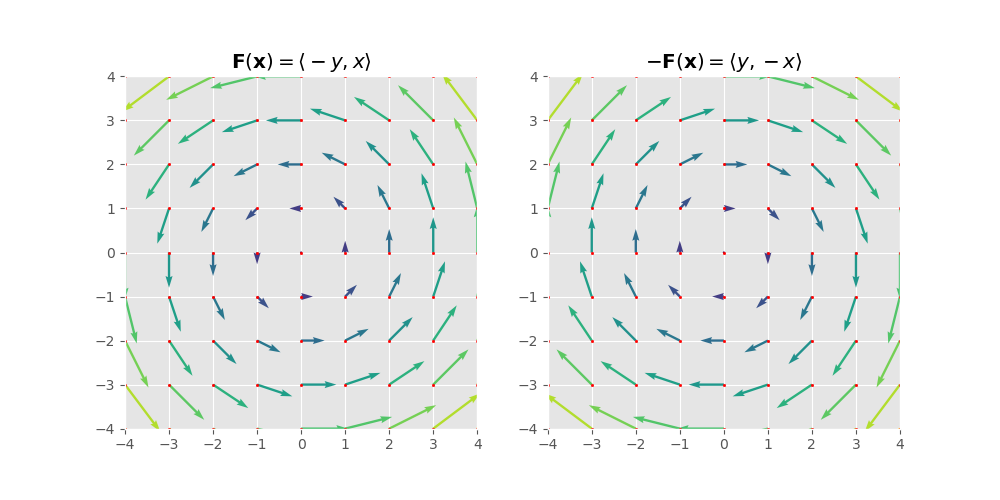

In [2]:
c=4

n  =np.linspace(-c,c,2*c+1)
x,y=np.meshgrid(n,n)

u1 =-y
v1 = x

M  =np.hypot(u1,v1)

fig = plt.figure(figsize=(10,5));
ax1 = plt.subplot(121);
ax1.set_aspect(1);
ax1.quiver(x,y,u1,v1,M,pivot='tail',scale=30);
ax1.scatter(x,y,c='red',s=2.7);
ax1.set_xticks(np.arange(-c,c+1,1));
ax1.set_yticks(np.arange(-c,c+1,1));
ax1.set_xlim(-c,c);
ax1.set_ylim(-c,c);
ax1.set_title('$\mathbf{F}(\mathbf{x})=\\langle-y,x\\rangle$');

u2 = y
v2 =-x

M  =np.hypot(u2,v2)

ax2 = plt.subplot(122);
ax2.set_aspect(1);
ax2.quiver(x,y,u2,v2,M,pivot='tail',scale=30);
ax2.scatter(x,y,c='red',s=2.7);
ax2.set_xticks(np.arange(-c,c+1,1));
ax2.set_yticks(np.arange(-c,c+1,1));
ax2.set_xlim(-c,c);
ax2.set_ylim(-c,c);
ax2.set_title('$-\mathbf{F}(\mathbf{x})=\\langle y,-x\\rangle$');

In [3]:
fig = ff.create_quiver(x,y,u1,v1,scaleratio=1)
fig.update_layout(height=500,width=500,margin=dict(l=10,r=10,t=10,b=10))

---

$
\begin{aligned}
\mathbf{F(x)}&=\langle y,\sin x\rangle
\end{aligned}
$

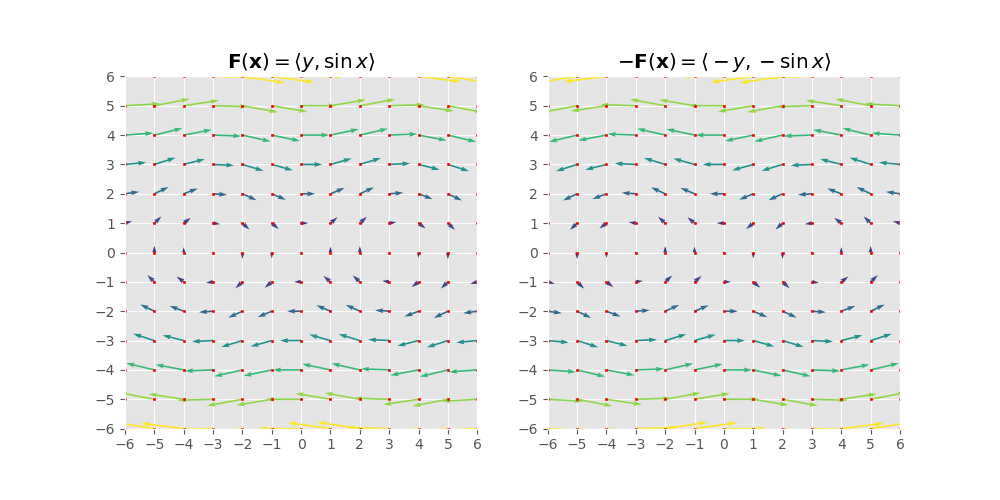

In [4]:
c=6

n  =np.linspace(-c,c,2*c+1)
x,y=np.meshgrid(n,n)

u1 =y
v1 =np.sin(x)

M  =np.hypot(u1,v1)

fig = plt.figure(figsize=(10,5));
ax1 = plt.subplot(121);
ax1.set_aspect(1);
ax1.quiver(x,y,u1,v1,M,scale=50);
ax1.scatter(x,y,c='red',s=2.7);
ax1.set_xticks(np.arange(-c,c+1,1));
ax1.set_yticks(np.arange(-c,c+1,1));
ax1.set_xlim(-c,c);
ax1.set_ylim(-c,c);
ax1.set_title('$\mathbf{F}(\mathbf{x})=\\langle y,\\sin x\\rangle$');

u2 =-y
v2 =-np.sin(x)

M  =np.hypot(u2,v2)

ax2 = plt.subplot(122);
ax2.set_aspect(1);
ax2.quiver(x,y,u2,v2,M,scale=50);
ax2.scatter(x,y,c='red',s=2.7);
ax2.set_xticks(np.arange(-c,c+1,1));
ax2.set_yticks(np.arange(-c,c+1,1));
ax2.set_xlim(-c,c);
ax2.set_ylim(-c,c);
ax2.set_title('$-\mathbf{F}(\mathbf{x})=\\langle-y,-\\sin x\\rangle$');

In [5]:
fig = ff.create_quiver(x,y,u1,v1,scaleratio=1)
fig.update_layout(height=500,width=500,margin=dict(l=10,r=10,t=10,b=10))

---

$
\mathbf{F(x)}=\langle\ln(1+y^2),\ln(1+x^2)\rangle
$

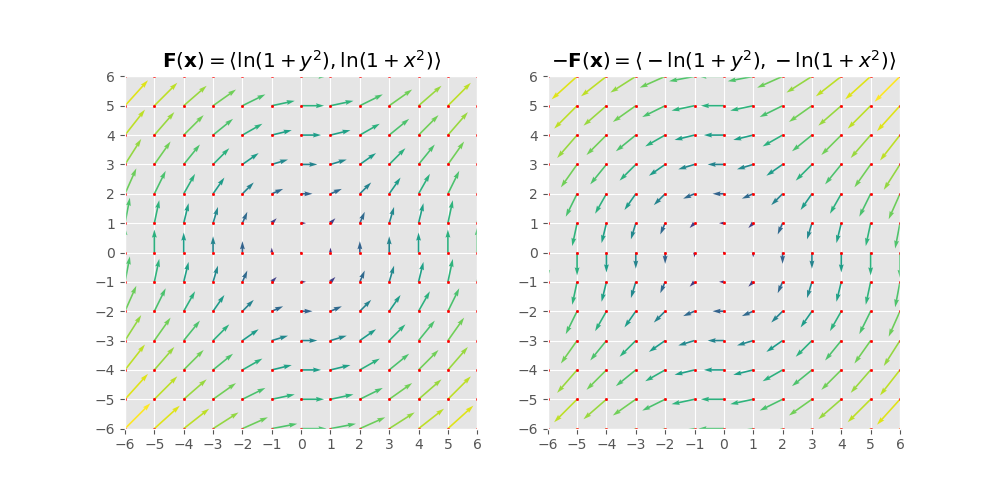

In [6]:
c=6

n  =np.linspace(-c,c,2*c+1)
x,y=np.meshgrid(n,n)

u1 =np.log(1+y**2)
v1 =np.log(1+x**2)

M  =np.hypot(u1,v1)

fig = plt.figure(figsize=(10,5));
ax1 = plt.subplot(121);
ax1.set_aspect(1);
ax1.quiver(x,y,u1,v1,M,scale=50);
ax1.scatter(x,y,c='red',s=2.7);
ax1.set_xticks(np.arange(-c,c+1,1));
ax1.set_yticks(np.arange(-c,c+1,1));
ax1.set_xlim(-c,c);
ax1.set_ylim(-c,c);
ax1.set_title('$\mathbf{F}(\mathbf{x})=\\langle\\ln(1+y^2),\\ln(1+x^2)\\rangle$');

u2 =-np.log(1+y**2)
v2 =-np.log(1+x**2)

M  =np.hypot(u2,v2)

ax2 = plt.subplot(122);
ax2.set_aspect(1);
ax2.quiver(x,y,u2,v2,M,scale=50);
ax2.scatter(x,y,c='red',s=2.7);
ax2.set_xticks(np.arange(-c,c+1,1));
ax2.set_yticks(np.arange(-c,c+1,1));
ax2.set_xlim(-c,c);
ax2.set_ylim(-c,c);
ax2.set_title('$-\mathbf{F}(\mathbf{x})=\\langle-\\ln(1+y^2),-\\ln(1+x^2)\\rangle$');

In [7]:
fig = ff.create_quiver(x,y,u1,v1,scaleratio=1)
fig.update_layout(height=500,width=500,margin=dict(l=10,r=10,t=10,b=10))

---

$
\mathbf{F(x)}=z\mathbf{k}=\langle 0,0,z\rangle
$

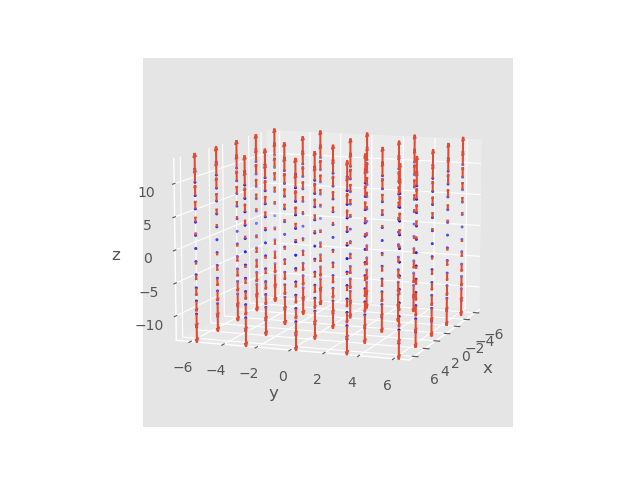

In [8]:
c=6

n    =np.arange(-c,c+1,3)
x,y,z=np.meshgrid(n,n,np.arange(-2*c,2*c+1,2))

u=0*x
v=0*y
w=z

fig = plt.figure();
ax  = plt.subplot(projection='3d');
ax.quiver(x,y,z,u,v,w,length=0.2);
ax.scatter(x,y,z,c='blue',s=2.7);
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('z');
ax.view_init(10,20);

In [9]:
fig = go.Figure(data=go.Cone(
  x=x.flatten(),
  y=y.flatten(),
  z=z.flatten(),
  u=u.flatten(),
  v=v.flatten(),
  w=w.flatten(),
  colorscale='Blues',
  sizemode='absolute',
  sizeref=10,
))
fig.update_layout(
  height=600,width=600,
  margin=dict(l=10,r=10,t=10,b=10),
  scene=dict(
    aspectratio=dict(x=1,y=1,z=1),
    camera_eye=dict(x=1.75,y=1.5,z=0.25)
  )
)

---

$
\mathbf{F(x)}=\langle y,z,x\rangle
$

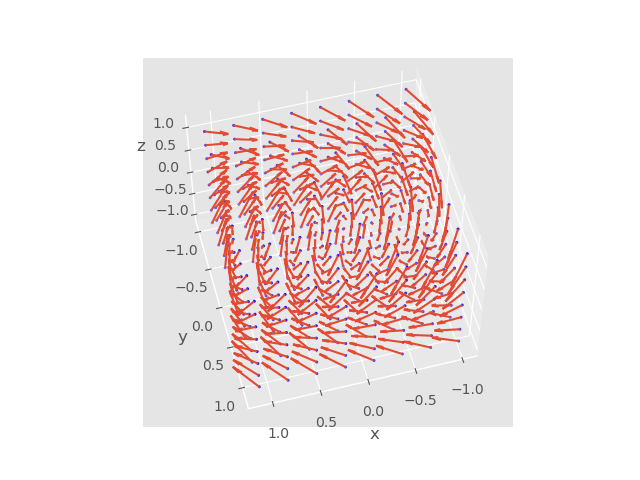

In [10]:
c=1
s=0.3

n    =np.arange(-c,c+s,s)
x,y,z=np.meshgrid(n,n,np.arange(-c,c+s,s))

u=y
v=z
w=x

fig = plt.figure();
ax  = plt.subplot(projection='3d');
ax.quiver(x,y,z,u,v,w,length=0.2);
ax.scatter(x,y,z,c='blue',s=2.7);
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('z');
ax.view_init(55,75);

In [11]:
fig = go.Figure(data=go.Cone(
  x=x.flatten(),
  y=y.flatten(),
  z=z.flatten(),
  u=u.flatten(),
  v=v.flatten(),
  w=w.flatten(),
  colorscale='Blues',
  sizemode='absolute',
))
fig.update_layout(
  height=600,width=600,
  margin=dict(l=10,r=10,t=10,b=10),
  scene=dict(
    aspectratio=dict(x=1,y=1,z=1),
    camera_eye=dict(x=2,y=1,z=2)
  )
)

---

$
\mathbf{F(x)}=\langle y,-2,x\rangle
$

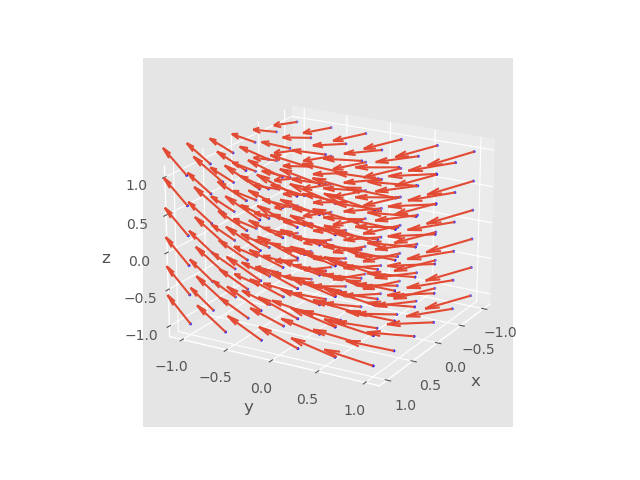

In [12]:
c=1
s=0.4

n    =np.arange(-c,c+s,s)
x,y,z=np.meshgrid(n,n,np.arange(-c,c+s,s))

u=y
v=-2+0*x
w=x

fig = plt.figure();
ax  = plt.subplot(projection='3d');
ax.quiver(x,y,z,u,v,w,length=0.2);
ax.scatter(x,y,z,c='blue',s=2.7);
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('z');
ax.view_init(20,30);

In [13]:
fig = go.Figure(data=go.Cone(
  x=x.flatten(),
  y=y.flatten(),
  z=z.flatten(),
  u=u.flatten(),
  v=v.flatten(),
  w=w.flatten(),
  colorscale='Blues',
  sizemode='absolute',
))
fig.update_layout(
  height=600,width=600,
  margin=dict(l=10,r=10,t=10,b=10),
  scene=dict(
    aspectratio=dict(x=1,y=1,z=1),
    camera_eye=dict(x=2,y=1,z=1)
  )
)

---

$
\begin{aligned}
\mathbf{F(x)}=\left\langle\frac{y}{z},-\frac{x}{z},\frac{2}{4}\right\rangle
\end{aligned}
$

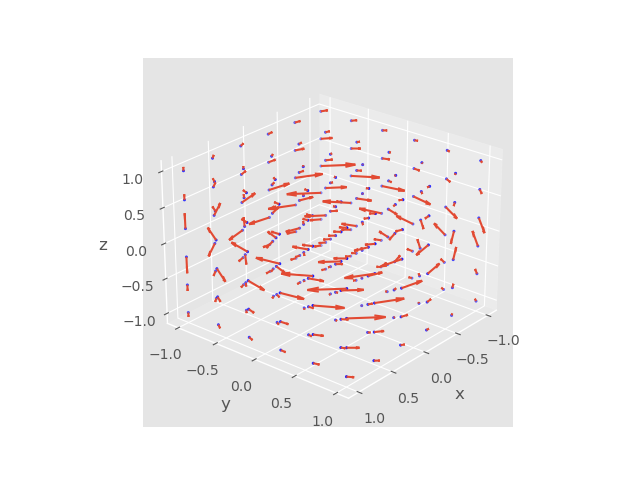

In [14]:
c=1
s=0.4

n    =np.arange(-c,c+s,s)
x,y,z=np.meshgrid(n,n,np.arange(-c,c+s,s))

u= y/z
v=-x/z
w= z/4

fig = plt.figure();
ax  = plt.subplot(projection='3d');
ax.quiver(x,y,z,u,v,w,length=0.05);
ax.scatter(x,y,z,c='blue',s=2.7);
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('z');
ax.view_init(25,40);

In [15]:
fig = go.Figure(data=go.Cone(
  x=x.flatten(),
  y=y.flatten(),
  z=z.flatten(),
  u=u.flatten(),
  v=v.flatten(),
  w=w.flatten(),
  colorscale='Blues',
  sizemode='absolute',
))
fig.update_layout(
  height=600,width=600,
  margin=dict(l=10,r=10,t=10,b=10),
  scene=dict(
    aspectratio=dict(x=1,y=1,z=1),
    camera_eye=dict(x=2,y=1,z=1)
  )
)

---

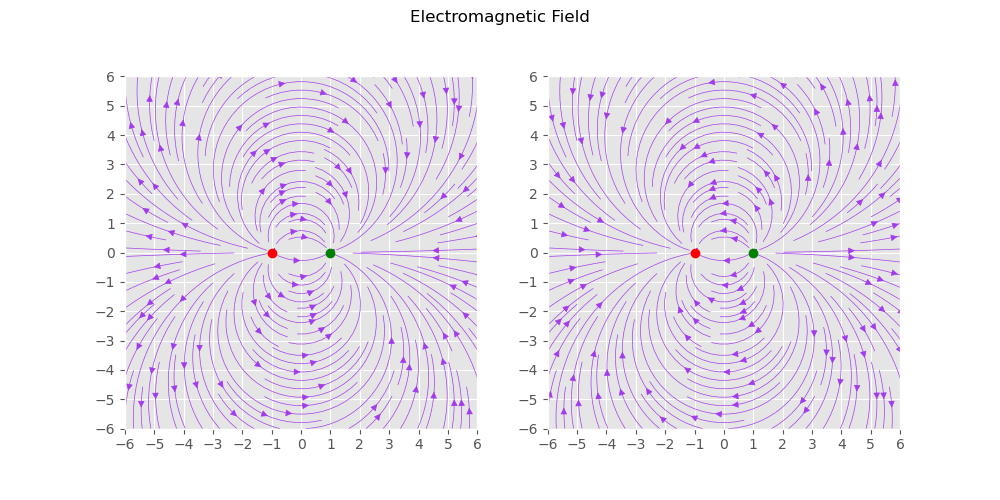

In [16]:
c=6

n  =np.arange(-c,c+1,0.1)
x,y=np.meshgrid(n,n)

u1 =(x+1)/((x+1)**2+y**2)-(x-1)/((x-1)**2+y**2)
v1 =y/((x+1)**2+y**2)-y/((x-1)**2+y**2)

fig = plt.figure(figsize=(10,5));
ax1 = plt.subplot(121);
ax1.set_aspect(1);
ax1.streamplot(x,y,u1,v1,density=1.5,linewidth=0.5,color='#A23BEC');
ax1.plot(-1,0,'-or');
ax1.plot( 1,0,'-og');
ax1.set_xticks(np.arange(-c,c+1,1));
ax1.set_yticks(np.arange(-c,c+1,1));
ax1.set_xlim(-c,c);
ax1.set_ylim(-c,c);

u2 =-((x+1)/((x+1)**2+y**2)-(x-1)/((x-1)**2+y**2))
v2 =-(y/((x+1)**2+y**2)-y/((x-1)**2+y**2))

ax2 = plt.subplot(122);
ax2.set_aspect(1);
ax2.streamplot(x,y,u2,v2,density=1.5,linewidth=0.5,color='#A23BEC');
ax2.plot(-1,0,'-or');
ax2.plot( 1,0,'-og');
ax2.set_xticks(np.arange(-c,c+1,1));
ax2.set_yticks(np.arange(-c,c+1,1));
ax2.set_xlim(-c,c);
ax2.set_ylim(-c,c);

fig.suptitle('Electromagnetic Field');

---